<a href="https://colab.research.google.com/github/lexiconlp/transformer-under-the-hood/blob/chore%2Fjupyters-notebooks/2_attention_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Utils 🔨🪛🔩🔧

In [ ]:
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
num_points = 20
np.random.seed(324)
points = np.random.rand(num_points,2)
random.seed(0)

In [ ]:
def _plot_attention(attentions, rand_colors):
  plt.bar(range(len(attentions)), attentions)
  plt.xticks(range(len(attentions)), rand_colors,rotation=90)

  plt.show()


# 1. Explanation attention mechanism

## 1.1 Random points

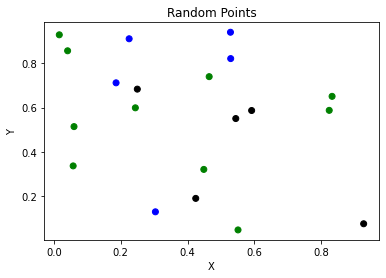

In [ ]:
colors = ["blue", "green", "black"]
rand_colors = [random.choice(colors) for _ in range(num_points)]
plt.scatter(points[:,0], points[:,1], c=rand_colors)

plt.title("Random Points")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

## 1.2 One hot encoding ( vectors are information !! )

In [ ]:
colors

['blue', 'green', 'black']

In [ ]:
one_hot = np.eye(len(colors),dtype=int)
key_value = np.concatenate([one_hot[colors.index(color)].reshape(1, -1)for color in rand_colors],axis=0) 
key_value

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
pd.DataFrame({'color': rand_colors, 'vector': list(key_value)})

,color,vector
0,green,"[0, 1, 0]"
1,green,"[0, 1, 0]"
2,blue,"[1, 0, 0]"
3,green,"[0, 1, 0]"
4,black,"[0, 0, 1]"
5,green,"[0, 1, 0]"
6,green,"[0, 1, 0]"
7,green,"[0, 1, 0]"
8,green,"[0, 1, 0]"
9,green,"[0, 1, 0]"


<details>

<summary>Vectors representation</summary>

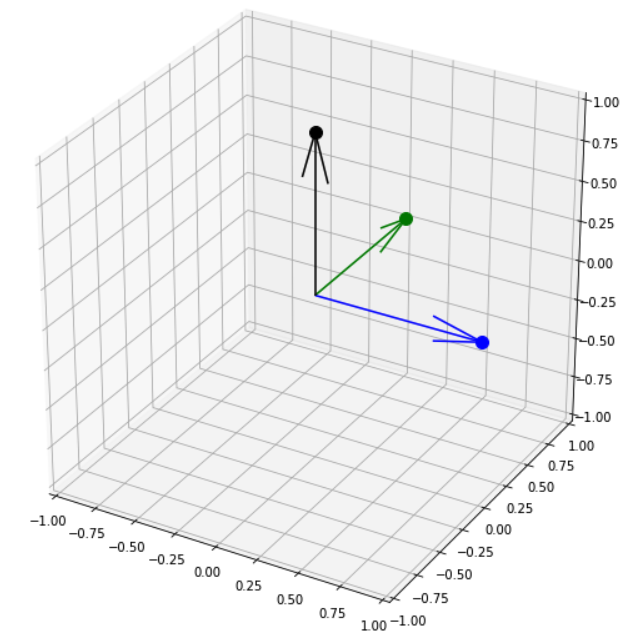

</details>

## 1.3 Dot product attention

In [ ]:
query_text = "green"
query = one_hot[colors.index(query_text)]
query_text,query

('green', array([0, 1, 0]))

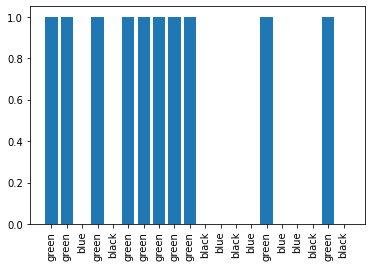

In [ ]:
_plot_attention(key_value.dot(query), rand_colors)

In [ ]:
key_value.dot(query).sum()

5

## 1.4 More than one query

In [ ]:
key_value.dot(np.array([[1,0,0],[0,1,0]]).T).mean(axis=1)

array([0.5, 0.5, 0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0.5, 0. ,
       0.5, 0.5, 0.5, 0.5, 0. , 0.5, 0. ])